# Análises do mercado financeiro

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-gk1040wj because the default path (/home/mbaltar/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
petro = yf.download('PETR4.SA', start='2017-01-01', end='2022-02-10')

[*********************100%***********************]  1 of 1 completed


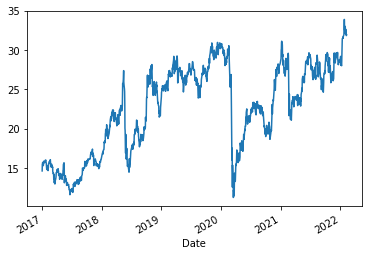

In [3]:
petro.Close.plot();

## Médias móveis

In [4]:
# Médias móveis no preço
petro.Close.rolling(5).mean()

Date
2017-01-02          NaN
2017-01-03          NaN
2017-01-04          NaN
2017-01-05          NaN
2017-01-06    15.414000
                ...    
2022-02-03    32.496000
2022-02-04    32.514000
2022-02-07    32.474001
2022-02-08    32.240001
2022-02-09    32.126001
Name: Close, Length: 1271, dtype: float64

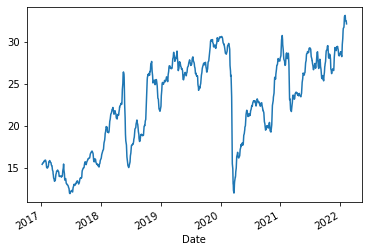

In [5]:
petro.Close.rolling(5).mean().plot();

## Retornos diários

In [6]:
petro['Adj Close'].pct_change()

Date
2017-01-02         NaN
2017-01-03    0.057299
2017-01-04    0.000000
2017-01-05    0.016129
2017-01-06   -0.005714
                ...   
2022-02-03   -0.013838
2022-02-04    0.017462
2022-02-07   -0.014710
2022-02-08   -0.009953
2022-02-09    0.003770
Name: Adj Close, Length: 1271, dtype: float64

In [7]:
retornos = pd.DataFrame(petro['Adj Close'].pct_change())
retornos.head()

,Adj Close
Date,
2017-01-02,NaN
2017-01-03,0.057299
2017-01-04,0.000000
2017-01-05,0.016129
2017-01-06,-0.005714


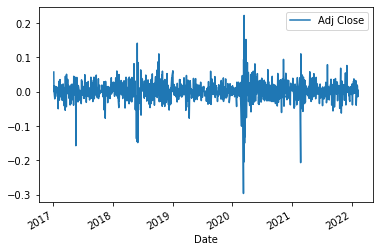

In [8]:
# Gráfico dos retornos diários (dá uma ideia da volatilidade do ativo)
retornos.plot();

In [9]:
# Retorno diário média
retornos.mean()

Adj Close    0.001297
dtype: float64

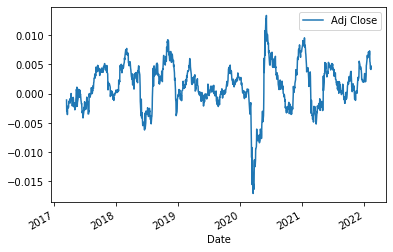

In [10]:
# Média móvel dos retornos
retornos.rolling(50).mean().plot();

## Volatilidade

In [11]:
# A medida mais simples de volatilidade é o desvio padrão

retornos.std()

Adj Close    0.029894
dtype: float64

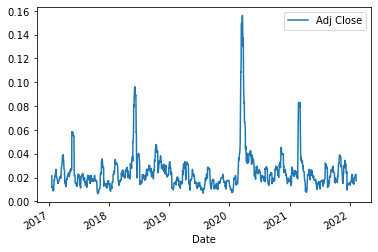

In [12]:
# Visualizando a volatilidade em janelas de tempo
janelas_vol = retornos.rolling(10).std()
janelas_vol.plot();

## Métricas estatísticas

In [13]:
retornos.describe()

,Adj Close
count,1270.000000
mean,0.001297
std,0.029894
min,-0.296978
25%,-0.012087
50%,0.001134
75%,0.014858
max,0.222222


## Distribuição dos retornos

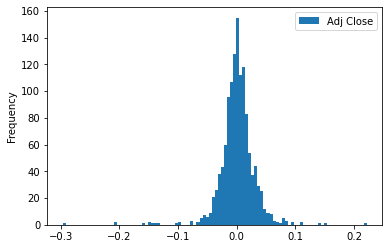

In [14]:
# Forma de entender onde os retornos se "concentram" com o tempo

retornos.plot.hist(bins=100);

## Drawdown

Perda máxima em um determinado período - distância entre ganho máximo e mínima

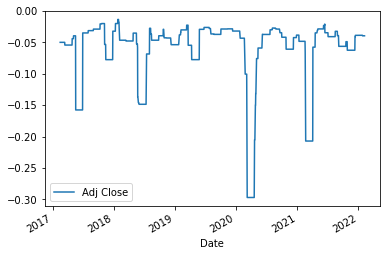

In [15]:
# Drawdown em janelas de 30 dias
dd_30 = retornos.rolling(30).min()
dd_30.plot();

## Retorno Acumulado

In [16]:
# Soma + 1 como uma referência (começou com 1)
retorno_acum = (retornos + 1).cumprod()
retorno_acum

,Adj Close
Date,
2017-01-02,NaN
2017-01-03,1.057299
2017-01-04,1.057299
2017-01-05,1.074352
2017-01-06,1.068213
...,...
2022-02-03,2.901194
2022-02-04,2.951855
2022-02-07,2.908432


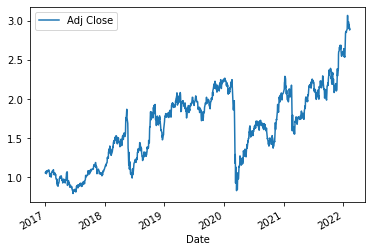

In [17]:
retorno_acum.plot();

### Cumulativo máximo

Picos atingidos ao longo do tempo

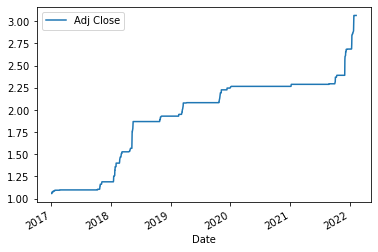

In [18]:
picos = retorno_acum.cummax()
picos.plot();

### Drawdown (outra forma de calcular)

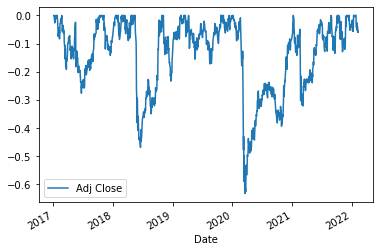

In [19]:
# Calcula a partir dos picos do retorno
drawdown = (retorno_acum - picos) / picos
drawdown.plot();

In [20]:
# Drawdown máximo
drawdown.min()

Adj Close   -0.633561
dtype: float64

Queda de 63% a partir de um pico

In [21]:
retornos['Retorno Acumulado'] = retorno_acum
retornos['Picos'] = picos
retornos['Drawdowns'] = drawdown
retornos.head()

,Adj Close,Retorno Acumulado,Picos,Drawdowns
Date,,,,
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,0.057299,1.057299,1.057299,0.000000
2017-01-04,0.000000,1.057299,1.057299,0.000000
2017-01-05,0.016129,1.074352,1.074352,0.000000
2017-01-06,-0.005714,1.068213,1.074352,-0.005714


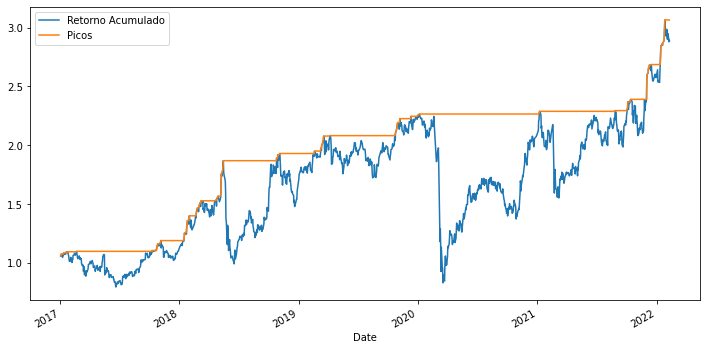

In [22]:
retornos[['Retorno Acumulado', 'Picos']].plot(figsize=(12, 6));

## Normalização

In [23]:
acoes = ['PETR4.SA', 'WEGE3.SA', 'MGLU3.SA', 'LREN3.SA', 'VALE3.SA', 'BPAC11.SA', 'OIBR3.SA']
data = yf.download(acoes, start='2019-01-01', end='2022-05-15')['Adj Close']

[*********************100%***********************]  7 of 7 completed


In [24]:
data.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2019-01-02,5.773697,37.106567,5.641578,1.26,15.523998,39.107304,8.597389
2019-01-03,6.012529,36.637955,5.581216,1.41,15.904679,37.507488,8.793435
2019-01-04,6.225854,35.232079,5.411353,1.41,15.949846,39.949306,8.893849
2019-01-07,6.353385,34.422630,5.495375,1.42,16.201483,39.734982,8.755181
2019-01-08,6.235074,35.530293,5.451089,1.38,16.104698,40.117710,8.683459


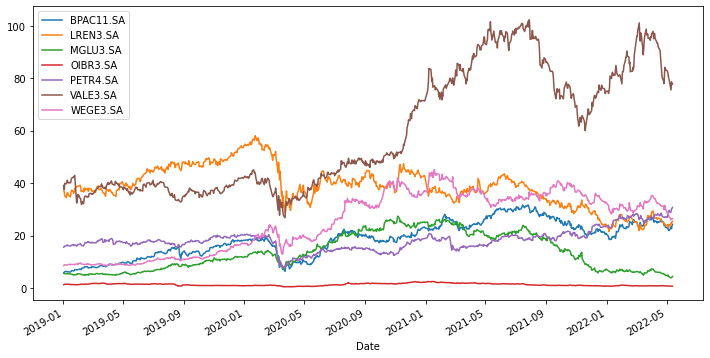

In [25]:
data.plot(figsize=(12, 6));

Papéis tem valores muito discrepantes para serem analisados em conjunto, então podemos normalizar

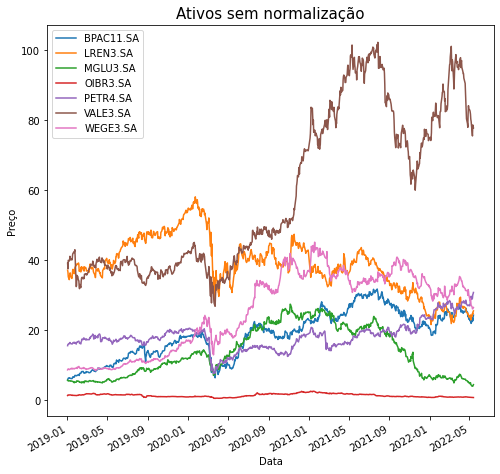

In [26]:
data.plot(figsize=(8, 8))
plt.title('Ativos sem normalização', fontsize=15)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

In [27]:
# Para normalizar divide cada preço pelo primeiro preço, então vai começar em 1
normalizado = data / data.iloc[0]
normalizado.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-03,1.041365,0.987371,0.989301,1.119048,1.024522,0.959092,1.022803
2019-01-04,1.078313,0.949484,0.959191,1.119048,1.027432,1.021531,1.034483
2019-01-07,1.100401,0.927669,0.974085,1.126984,1.043641,1.016050,1.018353
2019-01-08,1.079910,0.957520,0.966235,1.095238,1.037407,1.025837,1.010011


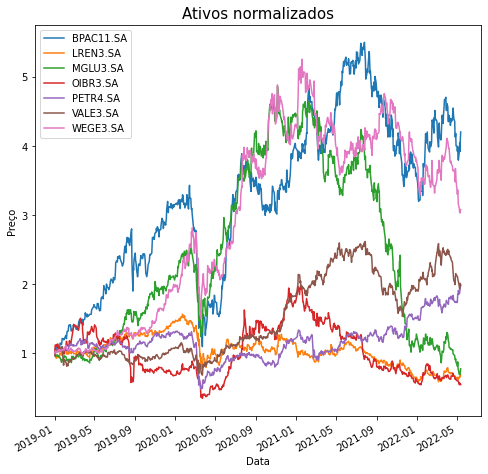

In [28]:
normalizado.plot(figsize=(8, 8))
plt.title('Ativos normalizados', fontsize=15)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

# Plot de cotação com volume

In [29]:
lren = yf.download('LREN3.SA', start='2017-01-01', end='2022-05-15')
lren.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,18.775900,19.013674,18.702108,18.972677,17.484585,676417
2017-01-03,19.103865,19.677799,18.808697,19.554813,18.021059,2976064
2017-01-04,19.636805,19.833582,19.177654,19.382631,17.862379,2671030
2017-01-05,19.464622,19.587610,19.161257,19.202253,17.696157,3587596
2017-01-06,19.202253,19.202253,18.808697,18.980877,17.492136,2139141


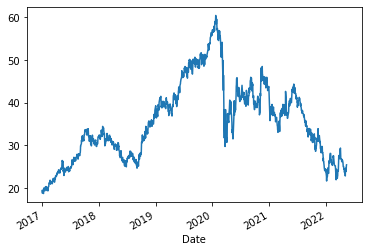

In [30]:
lren.Close.plot();

Text(0.5, 1.0, 'Fechamento| Volume | Cotação de LREN3')

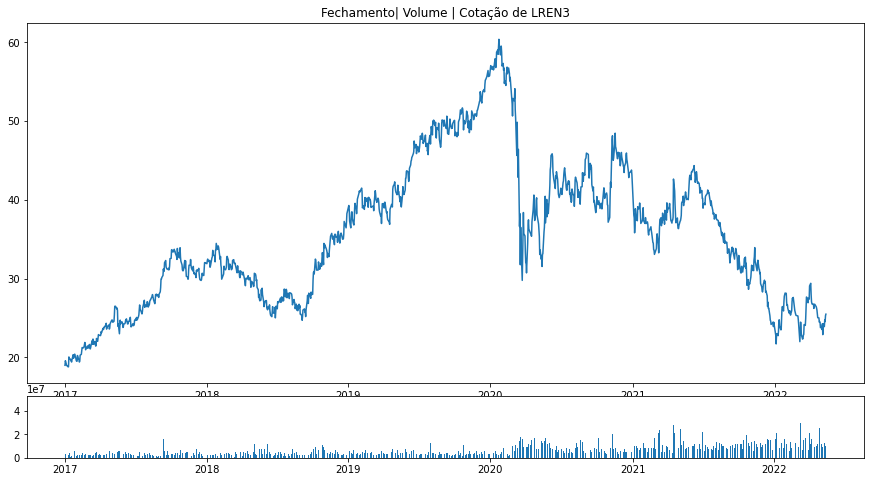

In [31]:
fig = plt.figure(figsize=(15, 8))
gs = fig.add_gridspec(nrows=6, ncols=1)
ax1 = fig.add_subplot(gs[0:5, 0])
ax2 = fig.add_subplot(gs[5, 0])

ax1.plot(lren.Close)
ax2.bar(lren.index, lren.Volume)

ax1.set_title('Fechamento| Volume | Cotação de LREN3')


# Matriz de Correlação

## Importando dados de FIIs, ETFS e BDRs

In [33]:
ativos = ['KNRI11.SA', 'ONEF11.SA', 'HCTR11.SA', 'HGLG11.SA', 'HGBS11.SA', 'SMAL11.SA', 'IVVB11.SA', 'AAPL34.SA']
inicio = '2017-01-01'

precos_ativos = pd.DataFrame()
for i in ativos:
    precos_ativos[i] = yf.download(i, start=inicio)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [34]:
precos_ativos.head()

,KNRI11.SA,ONEF11.SA,HCTR11.SA,HGLG11.SA,HGBS11.SA,SMAL11.SA,IVVB11.SA,AAPL34.SA
Date,,,,,,,,
2017-01-02,137.220795,91.424210,NaN,106.380798,196.671768,54.000000,74.25,8.866642
2017-01-03,137.133408,91.620811,NaN,106.380798,196.088760,55.450001,74.25,8.772816
2017-01-04,138.803650,91.620811,NaN,106.380798,195.797226,56.990002,74.25,8.742323
2017-01-05,138.861893,90.441147,NaN,106.380798,195.505722,56.990002,74.25,8.791580
2017-01-06,139.784409,90.441147,NaN,106.380798,196.283081,56.500000,74.25,8.840841


## Importando dados de índices, commodities e criptomoedas

In [36]:
# Índices
import investpy

search_results = investpy.search_quotes(text='bvsp', products=['indices'], countries=['brazil'], n_results=10)
for search_result in search_results[:1]:
    print(search_result)

{"id_": 17920, "name": "Bovespa", "symbol": "BVSP", "country": "brazil", "tag": "/indices/bovespa", "pair_type": "indices", "exchange": "BM&FBovespa"}


In [37]:
ibov = search_result.retrieve_historical_data(from_date='01/01/2017', to_date='15/05/2022')

In [38]:
ibov.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2017-01-02,60227.0,60227.0,59371.0,59589.0,833730,-1.06
2017-01-03,59631.0,61815.0,59631.0,61814.0,3431250,3.73
2017-01-04,61811.0,61940.0,61302.0,61589.0,2928720,-0.36
2017-01-05,61594.0,62409.0,61594.0,62071.0,3415520,0.78
2017-01-06,62072.0,62072.0,61396.0,61665.0,2448150,-0.65


In [39]:
# Buscando S&P500
search_results = investpy.search_quotes(text='spx', products=['indices'], countries=['united states'], n_results=10)
for search_result in search_results[:1]:
    print(search_result)
sp500 = search_result.retrieve_historical_data(from_date='01/01/2017', to_date='15/05/2022')

{"id_": 166, "name": "S&P 500", "symbol": "US500", "country": "united states", "tag": "/indices/us-spx-500", "pair_type": "indices", "exchange": "NYSE"}


In [40]:
sp500.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2017-01-03,2251.57,2263.88,2245.13,2257.83,0,0.85
2017-01-04,2261.60,2272.82,2261.60,2270.75,0,0.57
2017-01-05,2268.18,2271.50,2260.45,2269.00,0,-0.08
2017-01-06,2271.14,2282.10,2264.06,2276.98,0,0.35
2017-01-09,2273.59,2275.49,2268.90,2268.90,0,-0.35


In [45]:
# Modificando os dataframes para ser possível uní-los ao final
ibov.rename(columns={'Close': 'IBOV'}, inplace=True)
sp500.rename(columns={'Close': 'S&P500'}, inplace=True)

# Juntando os dataframes
indices = pd.merge(ibov, sp500, how='inner', on='Date')
indices.head()

,Open_x,High_x,Low_x,IBOV,Volume_x,Change Pct_x,Open_y,High_y,Low_y,S&P500,Volume_y,Change Pct_y
Date,,,,,,,,,,,,
2017-01-03,59631.0,61815.0,59631.0,61814.0,3431250,3.73,2251.57,2263.88,2245.13,2257.83,0,0.85
2017-01-04,61811.0,61940.0,61302.0,61589.0,2928720,-0.36,2261.60,2272.82,2261.60,2270.75,0,0.57
2017-01-05,61594.0,62409.0,61594.0,62071.0,3415520,0.78,2268.18,2271.50,2260.45,2269.00,0,-0.08
2017-01-06,62072.0,62072.0,61396.0,61665.0,2448150,-0.65,2271.14,2282.10,2264.06,2276.98,0,0.35
2017-01-09,61680.0,62112.0,61307.0,61700.0,2557490,0.06,2273.59,2275.49,2268.90,2268.90,0,-0.35


In [46]:
indices = indices[['IBOV', 'S&P500']]
indices.head()

,IBOV,S&P500
Date,,
2017-01-03,61814.0,2257.83
2017-01-04,61589.0,2270.75
2017-01-05,62071.0,2269.00
2017-01-06,61665.0,2276.98
2017-01-09,61700.0,2268.90


In [41]:
# Commodities
# Café
search_results = investpy.search_quotes(text='coffee', products=['commodities'], countries=['brazil'], n_results=10)
for search_result in search_results[:1]:
    print(search_result)
cafe = search_result.retrieve_historical_data(from_date='01/01/2017', to_date='15/05/2022')
cafe.head()

{"id_": 964526, "name": "Arabica Coffee 4/5 Futures", "symbol": "ICFc1", "country": null, "tag": "/commodities/arabica-coffee-4-5", "pair_type": "commodities", "exchange": "BM&FBovespa"}


,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2017-01-02,160.15,162.00,160.15,159.85,6,0.00
2017-01-03,163.70,165.35,160.50,163.30,576,2.16
2017-01-04,163.70,170.00,163.55,168.95,376,3.46
2017-01-05,170.90,172.95,169.00,170.90,278,1.15
2017-01-06,170.95,173.10,170.00,171.00,452,0.06


In [42]:
# Soja
search_results = investpy.search_quotes(text='soy', products=['commodities'], countries=['brazil'], n_results=10)
for search_result in search_results[:1]:
    print(search_result)
soja = search_result.retrieve_historical_data(from_date='01/01/2017', to_date='15/05/2022')
soja.head()

{"id_": 964523, "name": "US Soybeans Futures", "symbol": "SJCc1", "country": null, "tag": "/commodities/us-soybeans?cid=964523", "pair_type": "commodities", "exchange": "BM&FBovespa"}


,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2017-01-02,22.33,22.33,22.33,22.33,0,0.00
2017-01-03,22.05,22.06,21.95,21.94,130,-1.75
2017-01-04,21.99,22.33,21.99,22.38,159,2.01
2017-01-05,22.26,22.35,22.26,22.32,35,-0.27
2017-01-06,22.20,22.20,21.99,21.93,117,-1.75


In [43]:
# Etanol
search_results = investpy.search_quotes(text='ethanol', products=['commodities'], countries=['brazil'], n_results=10)
for search_result in search_results[:1]:
    print(search_result)
etanol = search_result.retrieve_historical_data(from_date='01/01/2017', to_date='15/05/2022')
etanol.head()

{"id_": 964525, "name": "Ethanol Futures", "symbol": "ETHc1", "country": null, "tag": "/commodities/ethanol-futures?cid=964525", "pair_type": "commodities", "exchange": "BM&FBovespa"}


,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2017-01-02,1925.0,1925.0,1925.0,1925.0,10,6.50
2017-01-03,1920.0,1935.0,1920.0,1930.0,152,0.26
2017-01-04,1930.0,1930.0,1920.0,1925.0,90,-0.26
2017-01-05,1915.0,1925.0,1915.0,1925.0,146,0.00
2017-01-06,1925.0,1925.0,1925.0,1925.0,150,0.00


In [47]:
# Transformando os dataframes para que seja possível uní-los após

cafe.rename(columns={'Close': 'cafe'}, inplace=True)
soja.rename(columns={'Close': 'soja'}, inplace=True)
etanol.rename(columns={'Close': 'etanol'}, inplace=True)

In [49]:
# Juntando todas as commodities em um único dataframe
# pode fazer executar dois merges seguidos no dataframe, como fizemos com os indices acima ou usar a biblioteca abaixo

from functools import reduce

lista_dfs = [cafe, soja, etanol]
commodities = reduce(lambda left, right: pd.merge(left, right, how='inner', on='Date'), lista_dfs)

commodities.head()

,Open_x,High_x,Low_x,cafe,Volume_x,Change Pct_x,Open_y,High_y,Low_y,soja,Volume_y,Change Pct_y,Open,High,Low,etanol,Volume,Change Pct
Date,,,,,,,,,,,,,,,,,,
2017-01-02,160.15,162.00,160.15,159.85,6,0.00,22.33,22.33,22.33,22.33,0,0.00,1925.0,1925.0,1925.0,1925.0,10,6.50
2017-01-03,163.70,165.35,160.50,163.30,576,2.16,22.05,22.06,21.95,21.94,130,-1.75,1920.0,1935.0,1920.0,1930.0,152,0.26
2017-01-04,163.70,170.00,163.55,168.95,376,3.46,21.99,22.33,21.99,22.38,159,2.01,1930.0,1930.0,1920.0,1925.0,90,-0.26
2017-01-05,170.90,172.95,169.00,170.90,278,1.15,22.26,22.35,22.26,22.32,35,-0.27,1915.0,1925.0,1915.0,1925.0,146,0.00
2017-01-06,170.95,173.10,170.00,171.00,452,0.06,22.20,22.20,21.99,21.93,117,-1.75,1925.0,1925.0,1925.0,1925.0,150,0.00


In [50]:
commodities = commodities[['cafe', 'soja', 'etanol']]
commodities.head()

,cafe,soja,etanol
Date,,,
2017-01-02,159.85,22.33,1925.0
2017-01-03,163.30,21.94,1930.0
2017-01-04,168.95,22.38,1925.0
2017-01-05,170.90,22.32,1925.0
2017-01-06,171.00,21.93,1925.0


In [52]:
# Criptomoedas

bitcoin = investpy.get_crypto_historical_data(crypto='bitcoin', from_date='01/01/2017', to_date='15/05/2022')
bitcoin.rename(columns = {'Close':'bitcoin'}, inplace=True)
bitcoin.head()

,Open,High,Low,bitcoin,Volume,Currency
Date,,,,,,
2017-01-01,963.4,1001.6,956.1,995.4,41149,USD
2017-01-02,995.4,1031.7,990.2,1017.0,64952,USD
2017-01-03,1017.0,1035.5,1006.5,1033.3,54788,USD
2017-01-04,1033.3,1148.5,1022.3,1135.4,156272,USD
2017-01-05,1135.4,1150.6,874.5,989.3,240008,USD


In [53]:
ethereum = investpy.get_crypto_historical_data(crypto='ethereum', from_date='01/01/2017', to_date='15/05/2022')
ethereum.rename(columns = {'Close':'ethereum'}, inplace=True)

In [54]:
cripto = pd.merge(bitcoin, ethereum, how='inner', on='Date')
cripto = cripto[['bitcoin', 'ethereum']]
cripto.head()

,bitcoin,ethereum
Date,,
2017-01-01,995.4,8.20
2017-01-02,1017.0,8.37
2017-01-03,1033.3,9.74
2017-01-04,1135.4,11.00
2017-01-05,989.3,10.15


In [55]:
# Dados do dólar
dolar = yf.download('USDBRL=X', start=inicio)
dolar.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,3.2532,3.2797,3.2427,3.2532,3.2532,0
2017-01-03,3.2841,3.2897,3.2475,3.2840,3.2840,0
2017-01-04,3.2635,3.2643,3.2188,3.2635,3.2635,0
2017-01-05,3.2149,3.2276,3.1998,3.2141,3.2141,0
2017-01-06,3.1975,3.2118,3.1894,3.1977,3.1977,0


In [56]:
# Fazendo tudo em um passo só: pegaando apenas a coluna close e mudando o nome dela
dolar = pd.DataFrame(dolar.Close).rename(columns={'Close':'Dolar'})
dolar.head()

,Dolar
Date,
2017-01-02,3.2532
2017-01-03,3.2840
2017-01-04,3.2635
2017-01-05,3.2141
2017-01-06,3.1977


## Dados de ações

In [57]:
data.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2019-01-02,5.773697,37.106567,5.641578,1.26,15.523998,39.107304,8.597389
2019-01-03,6.012529,36.637955,5.581216,1.41,15.904679,37.507488,8.793435
2019-01-04,6.225854,35.232079,5.411353,1.41,15.949846,39.949306,8.893849
2019-01-07,6.353385,34.422630,5.495375,1.42,16.201483,39.734982,8.755181
2019-01-08,6.235074,35.530293,5.451089,1.38,16.104698,40.117710,8.683459


## Juntando tudo em um dataframe só

In [58]:
# Garantindo que os índices dos dataframes tenham o mesmo formato
data.index = pd.to_datetime(data.index)
precos_ativos.index = pd.to_datetime(precos_ativos.index)
indices.index = pd.to_datetime(indices.index)
commodities.index = pd.to_datetime(commodities.index)
cripto.index = pd.to_datetime(cripto.index)
dolar.index = pd.to_datetime(dolar.index)

In [59]:
dfs = [data, precos_ativos, indices, commodities, cripto, dolar]
df_final = reduce(lambda left, right: pd.merge(left, right, how='inner', on='Date'), dfs)

In [60]:
df_final.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,KNRI11.SA,ONEF11.SA,HCTR11.SA,...,IVVB11.SA,AAPL34.SA,IBOV,S&P500,cafe,soja,etanol,bitcoin,ethereum,Dolar
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,5.773697,37.106567,5.641578,1.26,15.523998,39.107304,8.597389,145.954956,147.269745,NaN,...,74.25,14.617929,91012.0,2510.03,121.45,20.00,1730.0,3873.8,152.95,3.8799
2019-01-03,6.012529,36.637955,5.581216,1.41,15.904679,37.507488,8.793435,147.535553,147.269745,NaN,...,74.25,13.018451,91564.0,2447.89,124.95,20.12,1730.0,3780.1,146.94,3.7863
2019-01-04,6.225854,35.232079,5.411353,1.41,15.949846,39.949306,8.893849,147.653351,147.091843,NaN,...,74.25,13.226553,91841.0,2531.94,124.20,20.32,1730.0,3802.7,152.86,3.7551
2019-01-07,6.353385,34.422630,5.495375,1.42,16.201483,39.734982,8.755181,146.740341,142.327820,NaN,...,74.25,13.199937,91699.0,2549.69,124.35,20.38,1730.0,3985.9,149.96,3.6612
2019-01-08,6.235074,35.530293,5.451089,1.38,16.104698,40.117710,8.683459,146.956329,138.384140,NaN,...,74.25,13.596781,92032.0,2574.41,127.40,20.25,1690.0,3971.0,148.41,3.7341


In [61]:
retornos = df_final.pct_change().dropna()
retornos.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,KNRI11.SA,ONEF11.SA,HCTR11.SA,...,IVVB11.SA,AAPL34.SA,IBOV,S&P500,cafe,soja,etanol,bitcoin,ethereum,Dolar
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-17,0.004810,-0.004128,0.059020,0.020000,-0.025352,0.012296,-0.045339,0.006935,-0.003031,0.00036,...,0.0,0.008984,-0.012269,-0.005163,0.004751,-0.018163,0.016176,-0.142749,-0.214982,0.004506
2019-07-18,-0.009232,0.007254,0.010680,-0.032680,-0.006141,-0.001898,0.009765,0.000328,-0.006622,0.00000,...,0.0,-0.001703,0.008290,0.003582,0.012608,0.000514,0.001447,0.095462,0.067694,-0.001433
2019-07-19,-0.012597,-0.029836,-0.036235,-0.033784,-0.002545,0.002472,0.001758,-0.000656,0.000816,-0.00036,...,0.0,-0.007870,-0.012080,-0.006177,-0.013230,0.023112,0.008671,-0.007501,-0.022821,-0.011803
2019-07-22,-0.015204,0.008484,0.039068,-0.006993,0.001822,-0.005122,-0.008337,0.000000,0.006389,0.00045,...,0.0,0.020624,0.004804,0.002829,-0.022082,-0.017068,0.000000,-0.015040,-0.012813,0.007667
2019-07-23,-0.006389,-0.021030,-0.021629,0.035211,0.001091,-0.013155,-0.000885,-0.001312,-0.009049,0.00027,...,0.0,0.016839,-0.002357,0.006848,-0.028629,-0.001021,0.020057,-0.050305,-0.024854,-0.001628


## Matriz de correlação

In [62]:
import seaborn as sns

df_final.corr()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,KNRI11.SA,ONEF11.SA,HCTR11.SA,...,IVVB11.SA,AAPL34.SA,IBOV,S&P500,cafe,soja,etanol,bitcoin,ethereum,Dolar
BPAC11.SA,1.000000,-0.211798,0.486284,0.164509,0.463398,0.885591,0.824562,-0.366271,-0.079973,0.361448,...,0.776636,0.796806,0.848896,0.853332,0.565275,0.791279,0.742117,0.753564,0.693547,0.543609
LREN3.SA,-0.211798,1.000000,0.362951,0.361936,-0.497759,-0.475217,-0.303946,0.773224,0.433779,0.340631,...,-0.599031,-0.605579,0.036696,-0.541376,-0.745284,-0.571907,-0.594249,-0.554440,-0.655081,-0.391688
MGLU3.SA,0.486284,0.362951,1.000000,0.639027,-0.426465,0.257835,0.658536,0.360099,-0.066590,0.701904,...,0.363209,0.282218,0.366626,0.135727,-0.329215,0.105270,-0.073577,0.149316,-0.087130,0.555964
OIBR3.SA,0.164509,0.361936,0.639027,1.000000,-0.247665,0.112721,0.291446,0.281564,-0.091793,0.766526,...,-0.019253,-0.042936,0.357586,-0.079716,-0.444395,0.049006,-0.234615,-0.003867,-0.244845,0.023033
PETR4.SA,0.463398,-0.497759,-0.426465,-0.247665,1.000000,0.582706,0.215158,-0.559711,0.141412,-0.134371,...,0.352144,0.512066,0.549961,0.669724,0.819437,0.679241,0.721163,0.500195,0.636398,-0.059074
VALE3.SA,0.885591,-0.475217,0.257835,0.112721,0.582706,1.000000,0.718252,-0.610145,-0.273618,0.277540,...,0.789568,0.800383,0.804704,0.887688,0.700032,0.942443,0.808711,0.845993,0.794166,0.468313
WEGE3.SA,0.824562,-0.303946,0.658536,0.291446,0.215158,0.718252,1.000000,-0.246112,-0.201199,0.478685,...,0.881158,0.869199,0.577684,0.755081,0.432634,0.655310,0.598337,0.706052,0.587150,0.811704
KNRI11.SA,-0.366271,0.773224,0.360099,0.281564,-0.559711,-0.610145,-0.246112,1.000000,0.550592,0.300248,...,-0.546804,-0.535834,-0.233247,-0.634731,-0.776675,-0.630166,-0.702220,-0.621661,-0.752167,-0.192328
ONEF11.SA,-0.079973,0.433779,-0.066590,-0.091793,0.141412,-0.273618,-0.201199,0.550592,1.000000,0.014303,...,-0.412228,-0.281758,0.066218,-0.241396,-0.173968,-0.175493,-0.176086,-0.327541,-0.335054,-0.357616
HCTR11.SA,0.361448,0.340631,0.701904,0.766526,-0.134371,0.277540,0.478685,0.300248,0.014303,1.000000,...,0.118130,0.117994,0.520768,0.113384,-0.294890,0.210111,-0.054761,0.201785,-0.080501,0.181088


<AxesSubplot:>

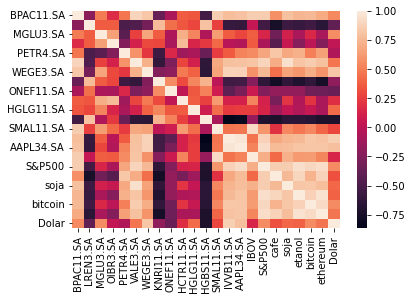

In [63]:
sns.heatmap(df_final.corr())

<AxesSubplot:>

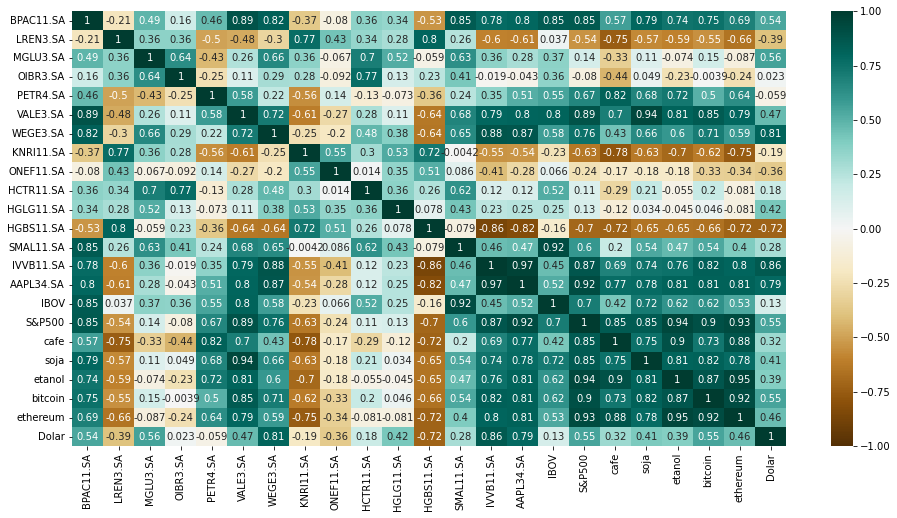

In [64]:
plt.figure(figsize=(16, 8))
sns.heatmap(df_final.corr(), vmin=-1, vmax=1, annot=True, cmap = 'BrBG')

# Comparação de uma carteira com o IBOV
Vamos simular um único aporte feito no primeiro dia

In [65]:
ativos = ['PETR4', 'VALE3', 'ABEV3', 'WEGE3', 'EMBR3', 'RADL3', 'CVCB3', 'CIEL3', 'OIBR3', 'KNRI11']

# Passo 1: colocar um .SA no final do nome dos ativos para buscar depois pelo yahoo finance
ativos = [i + '.SA' for i in ativos]

inicio = '2020-01-01'
fim = '2022-05-15'

df = yf.download(ativos, start=inicio, end=fim)['Adj Close']
df.head()

[*********************100%***********************]  10 of 10 completed


,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2020-01-02,17.917435,7.810123,44.709999,20.200001,195.954865,0.86,20.466221,22.584093,42.689384,17.114557
2020-01-03,17.665468,7.709877,44.200001,20.410000,195.954865,0.86,20.299559,22.080610,42.375092,16.896008
2020-01-06,17.749458,7.518496,43.820000,20.379999,194.364441,0.92,20.539551,21.645956,42.123653,16.939720
2020-01-07,17.786785,7.299777,44.400002,20.500000,195.120377,0.94,20.459557,21.348980,42.430092,17.070848
2020-01-08,17.702797,7.135736,44.340000,20.330000,184.075821,0.92,20.332890,21.634157,42.437943,16.424923


<AxesSubplot:xlabel='Date'>

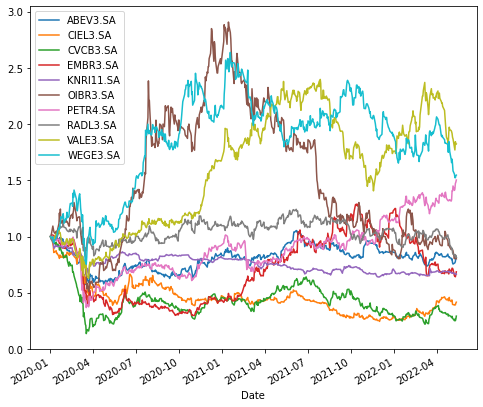

In [66]:
# Normalização dos ativos (não é estritamente necessário, mas o professor quis fazer)
normalizado = df / df.iloc[0]
normalizado.plot(figsize=(8, 7))

## Métricas básicas de carteira

In [67]:
# Preços no dia do aporte
primeiro = df.iloc[0]
primeiro

ABEV3.SA      17.917435
CIEL3.SA       7.810123
CVCB3.SA      44.709999
EMBR3.SA      20.200001
KNRI11.SA    195.954865
OIBR3.SA       0.860000
PETR4.SA      20.466221
RADL3.SA      22.584093
VALE3.SA      42.689384
WEGE3.SA      17.114557
Name: 2020-01-02 00:00:00, dtype: float64

In [68]:
# Supondo que vamos investir 1000 reais em cada papel
# Calculando quantos papéis vamos comprar de cada ativos
comprados = round(1000 / primeiro, 0)
comprados

ABEV3.SA       56.0
CIEL3.SA      128.0
CVCB3.SA       22.0
EMBR3.SA       50.0
KNRI11.SA       5.0
OIBR3.SA     1163.0
PETR4.SA       49.0
RADL3.SA       44.0
VALE3.SA       23.0
WEGE3.SA       58.0
Name: 2020-01-02 00:00:00, dtype: float64

## Construção da carteira e comparação com o IBOV

In [71]:
PL = df * comprados
PL.tail()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2022-05-09,766.639977,391.171387,247.500000,657.499981,658.303146,802.469997,1414.099188,832.920013,1759.269951,1543.749969
2022-05-10,768.879974,394.981506,261.580008,652.500010,655.024033,837.360033,1426.410965,834.679970,1737.420021,1512.481247
2022-05-11,781.199989,391.679993,247.279995,648.500013,654.825363,814.099986,1476.097990,812.239960,1809.870056,1511.323101
2022-05-12,810.879974,407.040009,261.799992,667.999983,648.465881,814.099986,1487.530401,827.199966,1791.700035,1529.273643
2022-05-13,814.239998,416.000000,287.320009,692.999983,652.589645,802.469997,1506.877480,811.360023,1789.629944,1534.485134


In [72]:
# Calculando o valor total
PL['PL Total'] = PL.sum(axis=1)
PL.tail()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,
2022-05-09,766.639977,391.171387,247.500000,657.499981,658.303146,802.469997,1414.099188,832.920013,1759.269951,1543.749969,9073.623609
2022-05-10,768.879974,394.981506,261.580008,652.500010,655.024033,837.360033,1426.410965,834.679970,1737.420021,1512.481247,9081.317766
2022-05-11,781.199989,391.679993,247.279995,648.500013,654.825363,814.099986,1476.097990,812.239960,1809.870056,1511.323101,9147.116447
2022-05-12,810.879974,407.040009,261.799992,667.999983,648.465881,814.099986,1487.530401,827.199966,1791.700035,1529.273643,9245.989871
2022-05-13,814.239998,416.000000,287.320009,692.999983,652.589645,802.469997,1506.877480,811.360023,1789.629944,1534.485134,9307.972214


In [73]:
ibov = yf.download('^BVSP', start=inicio, end=fim)

[*********************100%***********************]  1 of 1 completed


In [74]:
ibov.rename(columns={'Close':'IBOV'}, inplace=True)
ibov = ibov[['IBOV']]
ibov.head()

,IBOV
Date,
2020-01-02,118573.0
2020-01-03,117707.0
2020-01-06,116878.0
2020-01-07,116662.0
2020-01-08,116247.0


In [75]:
novo_df = pd.merge(ibov, PL, how='inner', on='Date')
novo_df.head()

,IBOV,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2020-01-02,118573.0,1003.376343,999.695740,983.619980,1010.000038,979.774323,1000.180017,1002.844822,993.700096,981.855843,992.644321,9947.691522
2020-01-03,117707.0,989.266220,986.864319,972.400017,1020.499992,979.774323,1000.180017,994.678373,971.546852,974.627106,979.968437,9869.805656
2020-01-06,116878.0,993.969666,962.367493,964.039993,1018.999958,971.822205,1069.960019,1006.437988,952.422066,968.844028,982.503769,9891.367185
2020-01-07,116662.0,996.059967,934.371399,976.800034,1025.000000,975.601883,1093.219997,1002.518272,939.355118,975.892113,990.109211,9908.927994
2020-01-08,116247.0,991.356628,913.374268,975.480003,1016.499996,920.379105,1069.960019,996.311588,951.902916,976.072678,952.645531,9763.982732


In [76]:
# Normalizando tudo para a mesma base (estipulou base 100)
novo_normalizado = (novo_df / novo_df.iloc[0]) * 100
novo_normalizado.head()

,IBOV,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2020-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2020-01-03,99.269648,98.593736,98.716467,98.859319,101.039599,100.000000,100.000000,99.185672,97.770631,99.263768,98.723019,99.217046
2020-01-06,98.570501,99.062498,96.266039,98.009395,100.891081,99.188372,106.976744,100.358297,95.846027,98.674773,98.978430,99.433795
2020-01-07,98.388335,99.270824,93.465578,99.306648,101.485145,99.574143,109.302323,99.967438,94.531048,99.392606,99.744610,99.610326
2020-01-08,98.038339,98.802073,91.365226,99.172447,100.643560,93.937867,106.976744,99.348530,95.793783,99.410997,95.970481,98.153252


<AxesSubplot:xlabel='Date'>

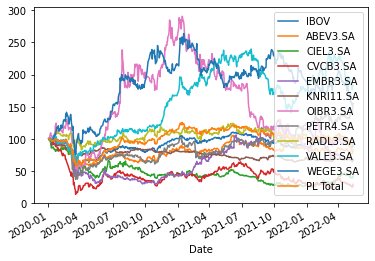

In [77]:
novo_normalizado.plot()

In [78]:
novo_normalizado.tail()

,IBOV,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2022-05-09,87.077159,76.406025,39.129044,25.162157,65.099006,67.189263,80.232557,141.008774,83.820060,179.178029,155.518944,91.213359
2022-05-10,86.959088,76.629271,39.510172,26.593605,64.603959,66.854582,83.720932,142.236459,83.997171,176.952659,152.368901,91.290705
2022-05-11,88.044496,77.857127,39.179920,25.139790,64.207920,66.834305,81.395346,147.191067,81.738943,184.331546,152.252229,91.952152
2022-05-12,89.133277,80.815138,40.716389,26.615969,66.138610,66.185229,81.395346,148.331065,83.244429,182.480967,154.060584,92.946086
2022-05-13,90.175672,81.150010,41.612661,29.210469,68.613857,66.606118,80.232557,150.260284,81.650392,182.270132,154.585595,93.569168


<AxesSubplot:xlabel='Date'>

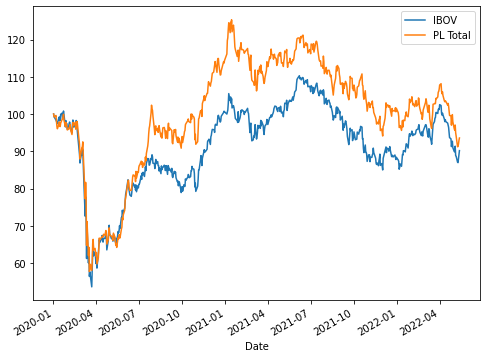

In [79]:
novo_normalizado[['IBOV', 'PL Total']].plot(figsize=(8, 6))

## E se o usuário conseguisse determinar o quanto ele iria aportar em cada ativo?

In [87]:
alocacoes = {'PETR4.SA': 2000,
 'VALE3.SA': 2000,
 'ABEV3.SA': 1000,
 'WEGE3.SA': 1000,
 'EMBR3.SA': 500,
 'RADL3.SA': 500,
 'CVCB3.SA': 500,
 'CIEL3.SA': 500,
 'OIBR3.SA': 500,
 'KNRI11.SA': 1500}

In [88]:
alocacoes_df = pd.Series(data=alocacoes, index=alocacoes.keys())

In [89]:
sum(alocacoes.values())

10000

In [90]:
alocacoes_df.head()

PETR4.SA    2000
VALE3.SA    2000
ABEV3.SA    1000
WEGE3.SA    1000
EMBR3.SA     500
dtype: int64

In [91]:
# Obtendo preços dos ativos no primeiro dia do investimento
compras = round(alocacoes_df / primeiro, 0)
compras

ABEV3.SA      56.0
CIEL3.SA      64.0
CVCB3.SA      11.0
EMBR3.SA      25.0
KNRI11.SA      8.0
OIBR3.SA     581.0
PETR4.SA      98.0
RADL3.SA      22.0
VALE3.SA      47.0
WEGE3.SA      58.0
dtype: float64

In [92]:
# Dataframe com posição diária de cada ativo

PL02 = df * compras
PL02.head()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2020-01-02,1003.376343,499.847870,491.809990,505.000019,1567.638916,499.660008,2005.689644,496.850048,2006.401070,992.644321
2020-01-03,989.266220,493.432159,486.200008,510.249996,1567.638916,499.660008,1989.356747,485.773426,1991.629303,979.968437
2020-01-06,993.969666,481.183746,482.019997,509.499979,1554.915527,534.520010,2012.875977,476.211033,1979.811710,982.503769
2020-01-07,996.059967,467.185699,488.400017,512.500000,1560.963013,546.139999,2005.036545,469.677559,1994.214317,990.109211
2020-01-08,991.356628,456.687134,487.740002,508.249998,1472.606567,534.520010,1992.623177,475.951458,1994.583298,952.645531


In [93]:
PL02['PL Total'] = PL02.sum(axis=1)
novo_df02 = pd.merge(ibov, PL02, how='inner', on='Date')
novo_df02.head()

,IBOV,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2020-01-02,118573.0,1003.376343,499.847870,491.809990,505.000019,1567.638916,499.660008,2005.689644,496.850048,2006.401070,992.644321,10068.918229
2020-01-03,117707.0,989.266220,493.432159,486.200008,510.249996,1567.638916,499.660008,1989.356747,485.773426,1991.629303,979.968437,9993.175221
2020-01-06,116878.0,993.969666,481.183746,482.019997,509.499979,1554.915527,534.520010,2012.875977,476.211033,1979.811710,982.503769,10007.511413
2020-01-07,116662.0,996.059967,467.185699,488.400017,512.500000,1560.963013,546.139999,2005.036545,469.677559,1994.214317,990.109211,10030.286327
2020-01-08,116247.0,991.356628,456.687134,487.740002,508.249998,1472.606567,534.520010,1992.623177,475.951458,1994.583298,952.645531,9866.963802


In [94]:
novo_normalizado_02 = (novo_df02 / novo_df02.iloc[0]) * 100
novo_normalizado_02.tail()

,IBOV,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2022-05-09,87.077159,76.406025,39.129044,25.162157,65.099006,67.189263,80.232557,141.008774,83.820060,179.178029,155.518944,111.753206
2022-05-10,86.959088,76.629271,39.510172,26.593605,64.603959,66.854582,83.720932,142.236459,83.997171,176.952659,152.368901,111.459763
2022-05-11,88.044496,77.857127,39.179920,25.139790,64.207920,66.834305,81.395346,147.191067,81.738943,184.331546,152.252229,113.690661
2022-05-12,89.133277,80.815138,40.716389,26.615969,66.138610,66.185229,81.395346,148.331065,83.244429,182.480967,154.060584,114.240474
2022-05-13,90.175672,81.150010,41.612661,29.210469,68.613857,66.606118,80.232557,150.260284,81.650392,182.270132,154.585595,114.892416


<AxesSubplot:xlabel='Date'>

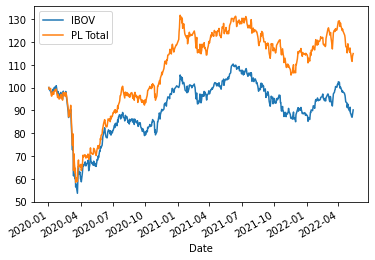

In [95]:
novo_normalizado_02[['IBOV', 'PL Total']].plot()